# Health Survey Data Analysis

Krist Zografi

## Executive Summary

In this project we going to cover: 
- Some data cleaning
- Calculate 95% confidence interval for average days people's physical health was not good. Using sample of 250, 500, 1000
- Create two subset and compare the average days people's physical health hasn't been good
- State hypotheses and perform test to deteminate test statistic and p-value
- Next steps


## The Data

These data are information gathered by CDC for behavioral risk factors in different states. The main two columns that we are going to use are:
- **PHYSHLTH**, which indicates the number of days a person physical health hasn't been good
- **RENTHOM1**, which indicates if the person lives in his own home or rent it

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

file_path = "https://raw.githubusercontent.com/learn-co-curriculum/da-phase3-project-enterprise/main/brfss_ny.csv"
df = pd.read_csv(file_path)

## Data Preparation

So the data we are going to work on this project are Number of Days Physical Health Not Good(PHYSHLTH column) and Own or Rent Home(RENTHOM1 column). So we are going to create a dataframe that has only these two columns.

In [2]:
new_df = df[['PHYSHLTH' , 'RENTHOM1']]
new_df

,PHYSHLTH,RENTHOM1
0,88.0,2.0
1,14.0,1.0
2,88.0,2.0
3,5.0,3.0
4,88.0,2.0
...,...,...
14764,88.0,2.0
14765,88.0,2.0
14766,2.0,2.0
14767,88.0,2.0


In [3]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14769 entries, 0 to 14768
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   PHYSHLTH  14769 non-null  float64
 1   RENTHOM1  14769 non-null  float64
dtypes: float64(2)
memory usage: 230.9 KB


There are some unwanted values into the dataframes so we are going to clean the rows we dont need, starting with the PHYSHLTH. We dont need values above 30, below 0, also we need to replace all 88 value with 0. 

In [4]:
#First lets replace 88 with 0 
new_df['PHYSHLTH'] = new_df['PHYSHLTH'].replace([88], 0)

#Lets check all the values this column has
new_df['PHYSHLTH'].value_counts().sort_index()

0.0     10565
1.0       410
2.0       597
3.0       361
4.0       163
5.0       367
6.0        47
7.0       209
8.0        45
9.0        11
10.0      231
11.0        4
12.0       22
13.0        7
14.0      144
15.0      194
16.0        6
17.0        6
18.0        6
19.0        2
20.0      147
21.0       26
22.0        1
23.0        3
24.0        5
25.0       55
26.0        3
27.0        5
28.0       22
29.0        8
30.0      768
77.0      248
99.0       81
Name: PHYSHLTH, dtype: int64

Time to remove values that are above 30.

In [5]:
new_df = new_df[new_df['PHYSHLTH'] <= 30]
new_df['PHYSHLTH'].value_counts().sort_index()

0.0     10565
1.0       410
2.0       597
3.0       361
4.0       163
5.0       367
6.0        47
7.0       209
8.0        45
9.0        11
10.0      231
11.0        4
12.0       22
13.0        7
14.0      144
15.0      194
16.0        6
17.0        6
18.0        6
19.0        2
20.0      147
21.0       26
22.0        1
23.0        3
24.0        5
25.0       55
26.0        3
27.0        5
28.0       22
29.0        8
30.0      768
Name: PHYSHLTH, dtype: int64

Now that we don't have any values below 0 or above 30 let's check if we have black values, checking this because the codebook mentioned some blank values... If there aren't any we will start cleaning the next column. 

In [6]:
new_df['PHYSHLTH'].isna().sum()

0

Time to start with **RENTHOM1** cleaning.

In [7]:
#First lets check what values it has
new_df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
3.0     585
9.0     141
7.0      55
Name: RENTHOM1, dtype: int64

Now let remove values other then 1(own) and 2(rent) on RENTHOM1 column

In [8]:
#Remove values higher than 2
new_df = new_df[new_df['RENTHOM1'] <= 2]
new_df['RENTHOM1'].value_counts()

1.0    8453
2.0    5206
Name: RENTHOM1, dtype: int64

Also let's check even for blank or null values.

In [9]:
new_df['RENTHOM1'].isna().sum()

0

This concludes the removing of unnecessary values from RENTHOM1 and PHYSHLTH columns 

## Confidence Interval for Mean of `PHYSHLTH`

In this part of the project we are going to calculate the 95% confidence interval about the mean of PHYSHLT. in short, we are going to determinate the mean number of days the people's physical health has not been good.
We are going to calculate the confidence with different number of samples. 
- 250
- 500
- 1000

Compare the range values for each sample size

**Note**: We need to set `random_state` when taking sample, otherwise the samples will be different each time.

In [10]:
#lets create a sample of 250
phys_cap = new_df['PHYSHLTH']
sample_250 = phys_cap.sample(n = 250, random_state= 42)

In [11]:
#Lets start by finding the mean of the sample for 250 values
sample_mean = sample_250.mean()
#The standard derivation 
sample_std = sample_250.std()
#size of the sample (even though we know is 250)
sample_size = len(sample_250)
#Sample error
se = sample_std / np.sqrt(sample_size)
print("Sample mean :", sample_mean, "\nSample error: ", se,"\nSample size : ", sample_size)

Sample mean : 3.064 
Sample error:  0.4934100016404977 
Sample size :  250


In [12]:
stats.t.interval(alpha = .95, loc = sample_mean, scale = se, df = sample_size -1)

(2.0922108109069333, 4.035789189093067)

To save us some time with the different samples, we are going to create a function we can add only the sample size and it will calculate the confidence interval for each sample.

In [13]:
def calculate_ci(sample):
    
    # Sample Mean
    sample_mean = sample.mean()

    # Sample Standard Deviation
    sample_std = sample.std()

    # Sample Standard Error
    se = stats.sem(sample)

    # Sample Size
    sample_size = len(sample)
    
    # Calculate and return confidence interval
    return stats.t.interval(alpha = .95, loc=sample_mean, scale=se, df=sample_size-1)

In [14]:
# Sample of 250
calculate_ci(sample_250)

(2.0922108109069337, 4.035789189093066)

With a sample size of 250, we are 95% confident that the true mean of days people's physical health has not been good is within 2.1 and 4 (days).

In [15]:
# Sample of 500
sample_500 = phys_cap.sample(n=500, random_state=42)
calculate_ci(sample_500)

(2.14104678624985, 3.4189532137501497)

With a sample size of 500, we are 95% confident that the true mean of days people's physical health has not been good is within 2.14 and 3.42 (days).

In [16]:
# Sample of 1000
sample_1000 = phys_cap.sample(n=1000, random_state=42)
calculate_ci(sample_1000)

(2.2518492978465194, 3.1281507021534805)

**Conclusion:**   
The larger the sample, the higher the certanty of our answer. Also we can say that between each sample there isn't much difference.  
So, with a sample size of 1000, we are 95% confident that the true mean of days people's physical health has not been good is within 2.25 and 3.13 (days).

## Differences in `PHYSHLTH` Based on `RENTHOM1`

### How Does `PHYSHLTH` Differ Based on `RENTHOM1`?

In this part of the project we are going to determine how health differs for different people based on the type of habitat they live in, so we are going to compare the health of people that live in their own homes and the ones who rent it.  
We are going to start by separating the data into main groups:
- Own home
- Rent it

**Own home**

In [17]:
own_home_gr = new_df.loc[(new_df['RENTHOM1'] == 1), 'PHYSHLTH']
own_home_gr

1        14.0
13        0.0
15        0.0
20        0.0
23        0.0
         ... 
14750     0.0
14751     0.0
14753     0.0
14760     0.0
14762     0.0
Name: PHYSHLTH, Length: 8453, dtype: float64

In [18]:
len(own_home_gr)

8453

**Rent it** 

In [19]:
rent_home_gr = new_df.loc[(new_df['RENTHOM1'] == 2), 'PHYSHLTH']
rent_home_gr

0        0.0
2        0.0
4        0.0
5        2.0
6        0.0
        ... 
14763    0.0
14764    0.0
14765    0.0
14766    2.0
14767    0.0
Name: PHYSHLTH, Length: 5206, dtype: float64

In [20]:
len(rent_home_gr)

5206

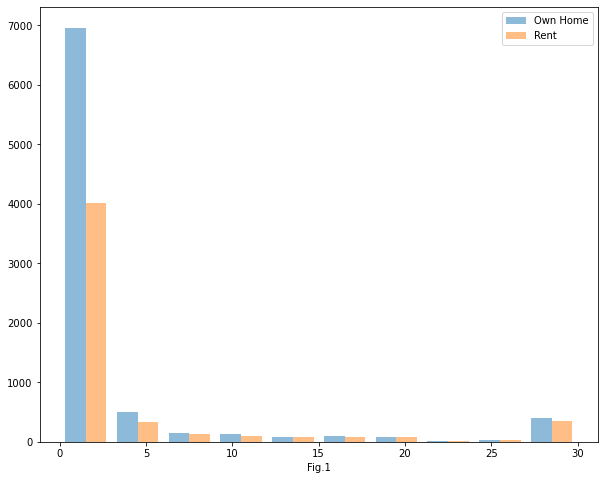

In [21]:
fig, ax = plt.subplots(figsize=(10,8))
ax.hist( x=[own_home_gr, rent_home_gr], label=[ 'Own Home', 'Rent'], alpha=.5)
ax.set_xlabel('Fig.1')
ax.legend()
plt.show()

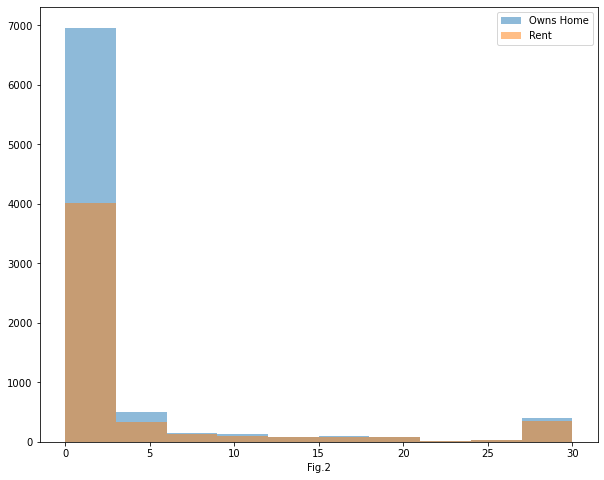

In [22]:
fig, ax = plt.subplots(figsize=(10,8))

ax.hist(own_home_gr, label='Owns Home', alpha=.5)
ax.hist(rent_home_gr, label='Rent', alpha=.5)
ax.set_xlabel('Fig.2')
ax.legend()
plt.show()

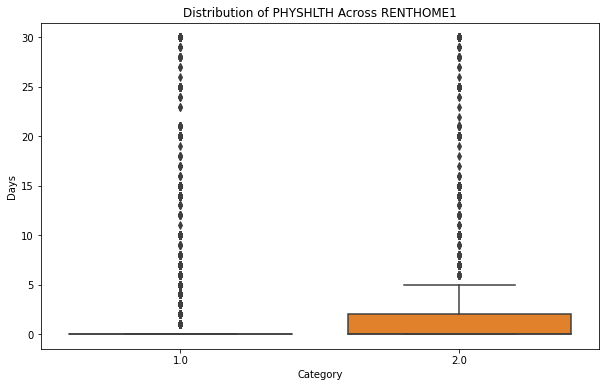

In [23]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=new_df, x='RENTHOM1', y='PHYSHLTH', ax=ax)

ax.set_title('Distribution of PHYSHLTH Across RENTHOME1')
ax.set_xlabel('Category')
ax.set_ylabel('Days');

In [24]:
own_home_gr.mean()

2.675854726132734

In [25]:
rent_home_gr.mean()

3.6959277756434883

**Conclusions:**  
From the different subplots, especially the boxplot, we can say that:
- The number of days people's physical health has’t been good in rent(home or apt) is higher than the ones who owns a home.
- People who rent have larger spread/variance than those who own a home.

## Is the Difference Statistically Significant?

Its time to determinate if the difference is significant between the two main groups or not. To do this we are going to start by stating ower Hypotheses:

**First: The Null Hypothesis ($H_0$)**
$H_0$ : There is no significant difference between the average number of days for the people who owns a home and the average number of days for the ones who rent it. 

**Secondly: The Alternative Hypothesis ($H_a$)**
$H_a$ : There is a significant difference between the average number of days for the people who owns a home and the average number of days for the ones who rent it. 


**Type Test:** Two tailed t-test or two-sample independent t-test. I choose this test because we are comparing two different populations: the ones that own their homes and the ones who rent it, so they live in different habitats. 

We are going to start by taking a sample of 250 for each group

In [26]:
#Own their home
own_sample = own_home_gr.sample(n=250, random_state=42)
#Rent it
rent_sample = rent_home_gr.sample(n=250, random_state=42)

print("Variance of owns home sample: ", own_sample.var())
print("Variance of rent sample: ", rent_sample.var())

Variance of owns home sample:  61.84314859437748
Variance of rent sample:  64.04954216867465


Now we are going to calculate the test statistic and p-value.

In [27]:
results = stats.ttest_ind(own_sample, rent_sample, equal_var=False, alternative='two-sided')
results

Ttest_indResult(statistic=-0.8680614271207988, pvalue=0.38577894497754583)

In [28]:
p_val = results[1]
print('P value of t test: ', p_val)

P value of t test:  0.38577894497754583


**Conclusion:** The p-value is 0.38, which is greater than our defined alpha value of .05, we fail to reject the null hypothesis.

## Next Steps

From what I could check from our codebook from CDC, I can say that there is so much analysis we can start investigating from it. On this project we had the number of days their physical health wasn't good for different habitats. So the next analysis might be that their health wasn't good for different genders like male or female. Or we can compare their mental health for different habitats or genres. It's hard to decide with all the information that the codebook has in it. Columns can be MENTHLTH with SEXVAR or RENTHOM1. 